# Plotting M/sigma over redshift for fixed mass

In [1]:
import sys
sys.path.append('/home/yja6qa/arepo_package/')

import arepo_package
import scipy.interpolate
import h5py
import os
import numpy as np
import plotting
from brahma_analysis import *
from sklearn.linear_model import LinearRegression

%matplotlib inline

h = 0.6774
radiative_efficiency=0.2

In [7]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
bFOFz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z1')
bFOFz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z2')
bFOFz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z3')
bFOFz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z4')
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
bFOFz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z6')
bFOFz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z7')
a = np.array([1/(1+z) for z in np.arange(0,8,1)]) # For redshift z=0 to z=7

# Storing the x sigma's
Sigma_bFOFz0 = np.log10(np.array(bFOFz0[5])[:,0]*a[0])
Sigma_bFOFz1 = np.log10(np.array(bFOFz1[5])[:,0]*a[1])
Sigma_bFOFz2 = np.log10(np.array(bFOFz2[5])[:,0]*a[2])
Sigma_bFOFz3 = np.log10(np.array(bFOFz3[5])[:,0]*a[3])
Sigma_bFOFz4 = np.log10(np.array(bFOFz4[5])[:,0]*a[4])
Sigma_bFOFz5 = np.log10(np.array(bFOFz5[5])[:,0]*a[5])
Sigma_bFOFz6 = np.log10(np.array(bFOFz6[5])[:,0]*a[6])
Sigma_bFOFz7 = np.log10(np.array(bFOFz7[5])[:,0]*a[7])

In [1]:
# sigmas = [1.25,1.625,2]
# bin_width = 0.05

# bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
# bFOF_masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

# bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)

In [2]:
bFOFz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z0')
bFOFz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z1')
bFOFz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z2')
bFOFz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z3')
bFOFz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z4')
bFOFz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z5')
bFOFz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z6')
bFOFz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_z7')

LW10z0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z0')
LW10z1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z1')
LW10z2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z2')
LW10z3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z3')
LW10z4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z4')
LW10z5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z5')
LW10z6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z6')
LW10z7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_z7')

spinz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z0')
spinz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z1')
spinz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z2')
spinz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z3')
spinz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z4')
spinz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z5')
spinz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z6')
spinz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_z7')

richz0=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z0')
richz1=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z1')
richz2=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z2')
richz3=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z3')
richz4=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z4')
richz5=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z5')
richz6=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z6')
richz7=ReadBrahmaData('Brahma_Data/output_ratio10_SFMFGM5_seed5.00_bFOF_LW10_spin_rich_z7')

# Illustris and TNG 
Illz0=ReadBrahmaData('Brahma_Data/Illustris_z0')
TNGz0=ReadBrahmaData('Brahma_Data/TNG_z0')

Illz5=ReadBrahmaData('Brahma_Data/Illustris_z5')
TNGz5=ReadBrahmaData('Brahma_Data/TNG_z5')

# $M_{BH}$ at fixed $\sigma$ vs. redshift

In [3]:
# Scale factor to convert to peculiar velocities
a = np.array([1/(1+z) for z in np.arange(0,8,1)]) # For redshift z=0 to z=7

# Storing the x sigma's
Sigma_bFOFz0 = np.log10(np.array(bFOFz0[5])[:,0]*a[0])
Sigma_bFOFz1 = np.log10(np.array(bFOFz1[5])[:,0]*a[1])
Sigma_bFOFz2 = np.log10(np.array(bFOFz2[5])[:,0]*a[2])
Sigma_bFOFz3 = np.log10(np.array(bFOFz3[5])[:,0]*a[3])
Sigma_bFOFz4 = np.log10(np.array(bFOFz4[5])[:,0]*a[4])
Sigma_bFOFz5 = np.log10(np.array(bFOFz5[5])[:,0]*a[5])
Sigma_bFOFz6 = np.log10(np.array(bFOFz6[5])[:,0]*a[6])
Sigma_bFOFz7 = np.log10(np.array(bFOFz7[5])[:,0]*a[7])

Sigma_LW10z0 = np.log10(np.array(LW10z0[5])[:,0]*a[0])
Sigma_LW10z1 = np.log10(np.array(LW10z1[5])[:,0]*a[1])
Sigma_LW10z2 = np.log10(np.array(LW10z2[5])[:,0]*a[2])
Sigma_LW10z3 = np.log10(np.array(LW10z3[5])[:,0]*a[3])
Sigma_LW10z4 = np.log10(np.array(LW10z4[5])[:,0]*a[4])
Sigma_LW10z5 = np.log10(np.array(LW10z5[5])[:,0]*a[5])
Sigma_LW10z6 = np.log10(np.array(LW10z6[5])[:,0]*a[6])
Sigma_LW10z7 = np.log10(np.array(LW10z7[5])[:,0]*a[7])

Sigma_spinz0 = np.log10(np.array(spinz0[5])[:,0]*a[0])
Sigma_spinz1 = np.log10(np.array(spinz1[5])[:,0]*a[1])
Sigma_spinz2 = np.log10(np.array(spinz2[5])[:,0]*a[2])
Sigma_spinz3 = np.log10(np.array(spinz3[5])[:,0]*a[3])
Sigma_spinz4 = np.log10(np.array(spinz4[5])[:,0]*a[4])
Sigma_spinz5 = np.log10(np.array(spinz5[5])[:,0]*a[5])
Sigma_spinz6 = np.log10(np.array(spinz6[5])[:,0]*a[6])
Sigma_spinz7 = np.log10(np.array(spinz7[5])[:,0]*a[7])

Sigma_richz0 = np.log10(np.array(richz0[5])[:,0]*a[0])
Sigma_richz1 = np.log10(np.array(richz1[5])[:,0]*a[1])
Sigma_richz2 = np.log10(np.array(richz2[5])[:,0]*a[2])
Sigma_richz3 = np.log10(np.array(richz3[5])[:,0]*a[3])
Sigma_richz4 = np.log10(np.array(richz4[5])[:,0]*a[4])
Sigma_richz5 = np.log10(np.array(richz5[5])[:,0]*a[5])
Sigma_richz6 = np.log10(np.array(richz6[5])[:,0]*a[6])
Sigma_richz7 = np.log10(np.array(richz7[5])[:,0]*a[7])

In [4]:
sigmas = [1,1.5,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
bFOF_masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

LW10_sigmas = [Sigma_LW10z0,Sigma_LW10z1,Sigma_LW10z2,Sigma_LW10z3,Sigma_LW10z4,Sigma_LW10z5,Sigma_LW10z6,Sigma_LW10z7]
LW10_masses = [LW10z0[0],LW10z1[0],LW10z2[0],LW10z3[0],LW10z4[0],LW10z5[0],LW10z6[0],LW10z7[0]]

spin_sigmas = [Sigma_spinz0,Sigma_spinz1,Sigma_spinz2,Sigma_spinz3,Sigma_spinz4,Sigma_spinz5,Sigma_spinz6,Sigma_spinz7]
spin_masses = [spinz0[0],spinz1[0],spinz2[0],spinz3[0],spinz4[0],spinz5[0],spinz6[0],spinz7[0]]

rich_sigmas = [Sigma_richz0,Sigma_richz1,Sigma_richz2,Sigma_richz3,Sigma_richz4,Sigma_richz5,Sigma_richz6,Sigma_richz7]
rich_masses = [richz0[0],richz1[0],richz2[0],richz3[0],richz4[0],richz5[0],richz6[0],richz7[0]]

bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_masses,sigmas,bin_width)
# LW10avgs,LW10stds = fixed_x(LW10_sigmas,LW10_masses,sigmas,bin_width)
# spinavgs,spinstds = fixed_x(spin_sigmas,spin_masses,sigmas,bin_width)
# richavgs,richstds = fixed_x(rich_sigmas,rich_masses,sigmas,bin_width)

/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in s

TypeError: only integer scalar arrays can be converted to a scalar index

In [17]:
np.array(bFOFavgs[2])*1e-7

array([2.31074702, 3.22571013, 4.31609389, 3.5873805 , 2.26804528,
       4.94284311, 2.4615342 , 2.8602216 ])

In [19]:
(2.31074702 - 2.8602216)/2.8602216

-0.19210909392475045

In [9]:
np.array(LW10avgs[2])*1e-7

array([1.4062611 , 1.20370554, 1.2960743 , 0.61926266, 1.28738374,
       0.44236389, 0.5363972 , 0.80854914])

In [10]:
(1.4062611 - 0.80854914)/0.80854914

0.7392401159439734

In [13]:
np.array(spinavgs[2])*1e-7

array([1.55686387, 1.02819634, 0.86361026, 0.27520611, 0.42043689,
       0.196388  , 0.28824251, 0.28900166])

In [14]:
(1.55686387 - 0.28900166)/0.28900166

4.387041271666051

In [20]:
# From z=3:
(1.55686387 - 0.27520611)/0.27520611

4.657083231182621

In [15]:
np.array(richavgs[2])*1e-7

array([1.27431544, 0.61431217, 0.59824902, 0.15286995, 0.14319427,
       0.11551896, 0.1546961 , 0.16372046])

In [16]:
(1.27431544 - 0.16372046)/0.16372046

6.783483139492767

In [21]:
# From z=3:
(1.55686387 - 0.15286995)/0.15286995

9.184237451506982

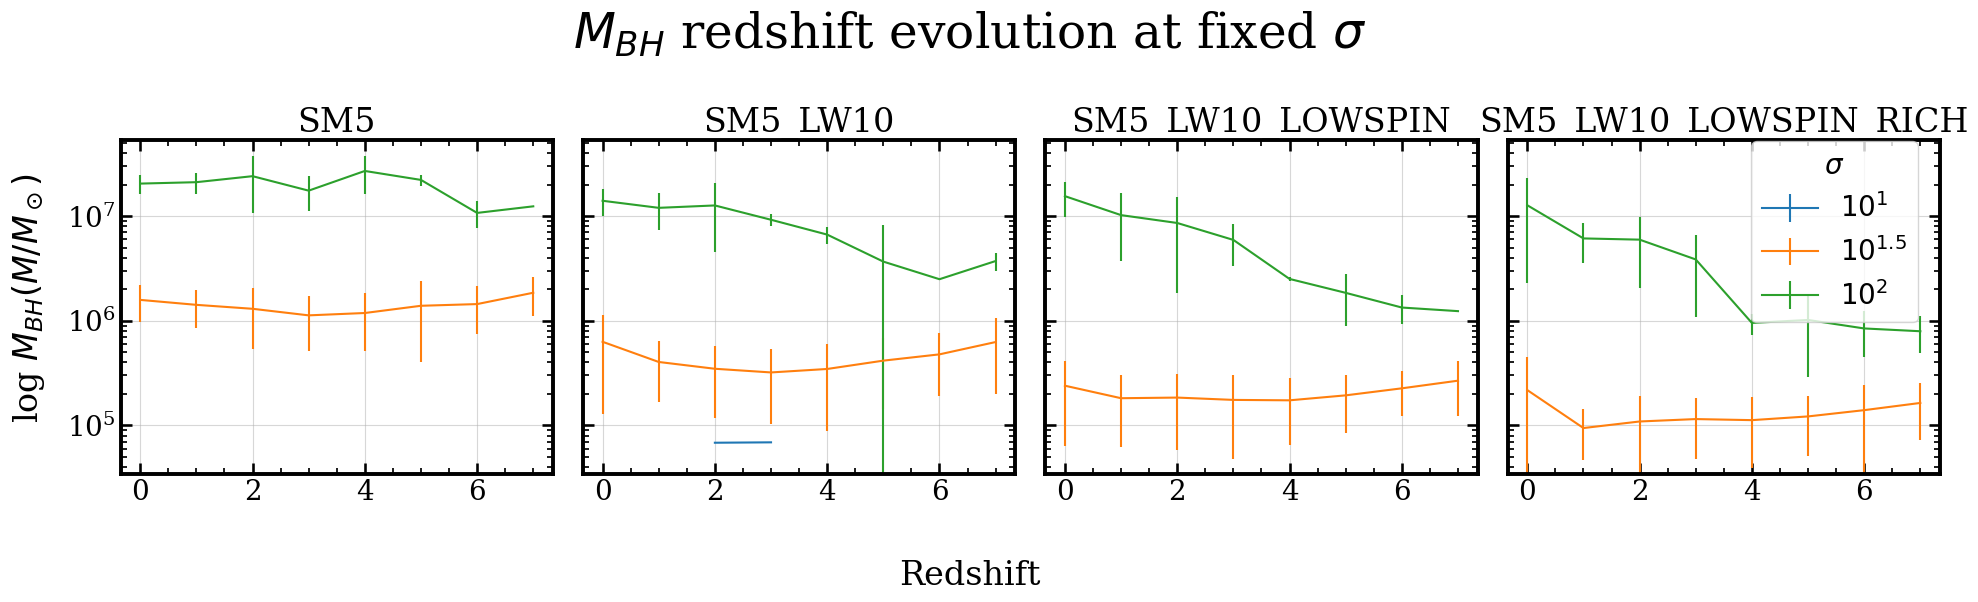

In [5]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^1$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{1.5}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{2}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_yscale('log')
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel('log $M_{BH} (M/M_\odot)$')
fig.suptitle('$M_{BH}$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = '$\sigma$',loc = (0.885,0.465),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Sigma_fixed_sigma_BH_mass.pdf')

# Plotting M - Mstar for fixed Mstar:

In [ ]:
MstarsbFOFz0 = np.log10([np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))])
MstarsbFOFz1 = np.log10([np.sum(bFOFz1[1][i]) for i in range(len(bFOFz1[1]))])
MstarsbFOFz2 = np.log10([np.sum(bFOFz2[1][i]) for i in range(len(bFOFz2[1]))])
MstarsbFOFz3 = np.log10([np.sum(bFOFz3[1][i]) for i in range(len(bFOFz3[1]))])
MstarsbFOFz4 = np.log10([np.sum(bFOFz4[1][i]) for i in range(len(bFOFz4[1]))])
MstarsbFOFz5 = np.log10([np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))])
MstarsbFOFz6 = np.log10([np.sum(bFOFz6[1][i]) for i in range(len(bFOFz6[1]))])
MstarsbFOFz7 = np.log10([np.sum(bFOFz7[1][i]) for i in range(len(bFOFz7[1]))])

MstarsLW10z0 = np.log10([np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))])
MstarsLW10z1 = np.log10([np.sum(LW10z1[1][i]) for i in range(len(LW10z1[1]))])
MstarsLW10z2 = np.log10([np.sum(LW10z2[1][i]) for i in range(len(LW10z2[1]))])
MstarsLW10z3 = np.log10([np.sum(LW10z3[1][i]) for i in range(len(LW10z3[1]))])
MstarsLW10z4 = np.log10([np.sum(LW10z4[1][i]) for i in range(len(LW10z4[1]))])
MstarsLW10z5 = np.log10([np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))])
MstarsLW10z6 = np.log10([np.sum(LW10z6[1][i]) for i in range(len(LW10z6[1]))])
MstarsLW10z7 = np.log10([np.sum(LW10z7[1][i]) for i in range(len(LW10z7[1]))])

Mstarsspinz0 = np.log10([np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))])
Mstarsspinz1 = np.log10([np.sum(spinz1[1][i]) for i in range(len(spinz1[1]))])
Mstarsspinz2 = np.log10([np.sum(spinz2[1][i]) for i in range(len(spinz2[1]))])
Mstarsspinz3 = np.log10([np.sum(spinz3[1][i]) for i in range(len(spinz3[1]))])
Mstarsspinz4 = np.log10([np.sum(spinz4[1][i]) for i in range(len(spinz4[1]))])
Mstarsspinz5 = np.log10([np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))])
Mstarsspinz6 = np.log10([np.sum(spinz6[1][i]) for i in range(len(spinz6[1]))])
Mstarsspinz7 = np.log10([np.sum(spinz7[1][i]) for i in range(len(spinz7[1]))])

Mstarsrichz0 = np.log10([np.sum(richz0[1][i]) for i in range(len(richz0[1]))])
Mstarsrichz1 = np.log10([np.sum(richz1[1][i]) for i in range(len(richz1[1]))])
Mstarsrichz2 = np.log10([np.sum(richz2[1][i]) for i in range(len(richz2[1]))])
Mstarsrichz3 = np.log10([np.sum(richz3[1][i]) for i in range(len(richz3[1]))])
Mstarsrichz4 = np.log10([np.sum(richz4[1][i]) for i in range(len(richz4[1]))])
Mstarsrichz5 = np.log10([np.sum(richz5[1][i]) for i in range(len(richz5[1]))])
Mstarsrichz6 = np.log10([np.sum(richz6[1][i]) for i in range(len(richz6[1]))])
Mstarsrichz7 = np.log10([np.sum(richz7[1][i]) for i in range(len(richz7[1]))])

In [ ]:
Mstars = [7,8,9]
bin_width = 0.05

bFOF_mstars = [MstarsbFOFz0,MstarsbFOFz1,MstarsbFOFz2,MstarsbFOFz3,MstarsbFOFz4,
               MstarsbFOFz5,MstarsbFOFz6,MstarsbFOFz7]
bFOF_masses = [bFOFz0[0],bFOFz1[0],bFOFz2[0],bFOFz3[0],bFOFz4[0],bFOFz5[0],bFOFz6[0],bFOFz7[0]]

LW10_mstars = [MstarsLW10z0,MstarsLW10z1,MstarsLW10z2,MstarsLW10z3,MstarsLW10z4,
               MstarsLW10z5,MstarsLW10z6,MstarsLW10z7]
LW10_masses = [LW10z0[0],LW10z1[0],LW10z2[0],LW10z3[0],LW10z4[0],LW10z5[0],LW10z6[0],LW10z7[0]]

spin_mstars = [Mstarsspinz0,Mstarsspinz1,Mstarsspinz2,Mstarsspinz3,Mstarsspinz4,
               Mstarsspinz5,Mstarsspinz6,Mstarsspinz7]
spin_masses = [spinz0[0],spinz1[0],spinz2[0],spinz3[0],spinz4[0],spinz5[0],spinz6[0],spinz7[0]]

rich_mstars = [Mstarsrichz0,Mstarsrichz1,Mstarsrichz2,Mstarsrichz3,Mstarsrichz4,
               Mstarsrichz5,Mstarsrichz6,Mstarsrichz7]
rich_masses = [richz0[0],richz1[0],richz2[0],richz3[0],richz4[0],richz5[0],richz6[0],richz7[0]]

bFOFavgs,bFOFstds = fixed_x(bFOF_mstars,bFOF_masses,Mstars,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_mstars,LW10_masses,Mstars,bin_width)
spinavgs,spinstds = fixed_x(spin_mstars,spin_masses,Mstars,bin_width)
richavgs,richstds = fixed_x(rich_mstars,rich_masses,Mstars,bin_width)

In [ ]:
# SM5 10^7:

vals,perc = precent_growth(bFOFavgs,0,[7,0])
vals,perc+1

In [ ]:
# SM5 10^8:

vals,perc = precent_growth(bFOFavgs,1,[7,0])
vals,perc+1

In [ ]:
# SM5 10^9:

vals,perc = precent_growth(bFOFavgs,2,[4,0])
vals,perc+1

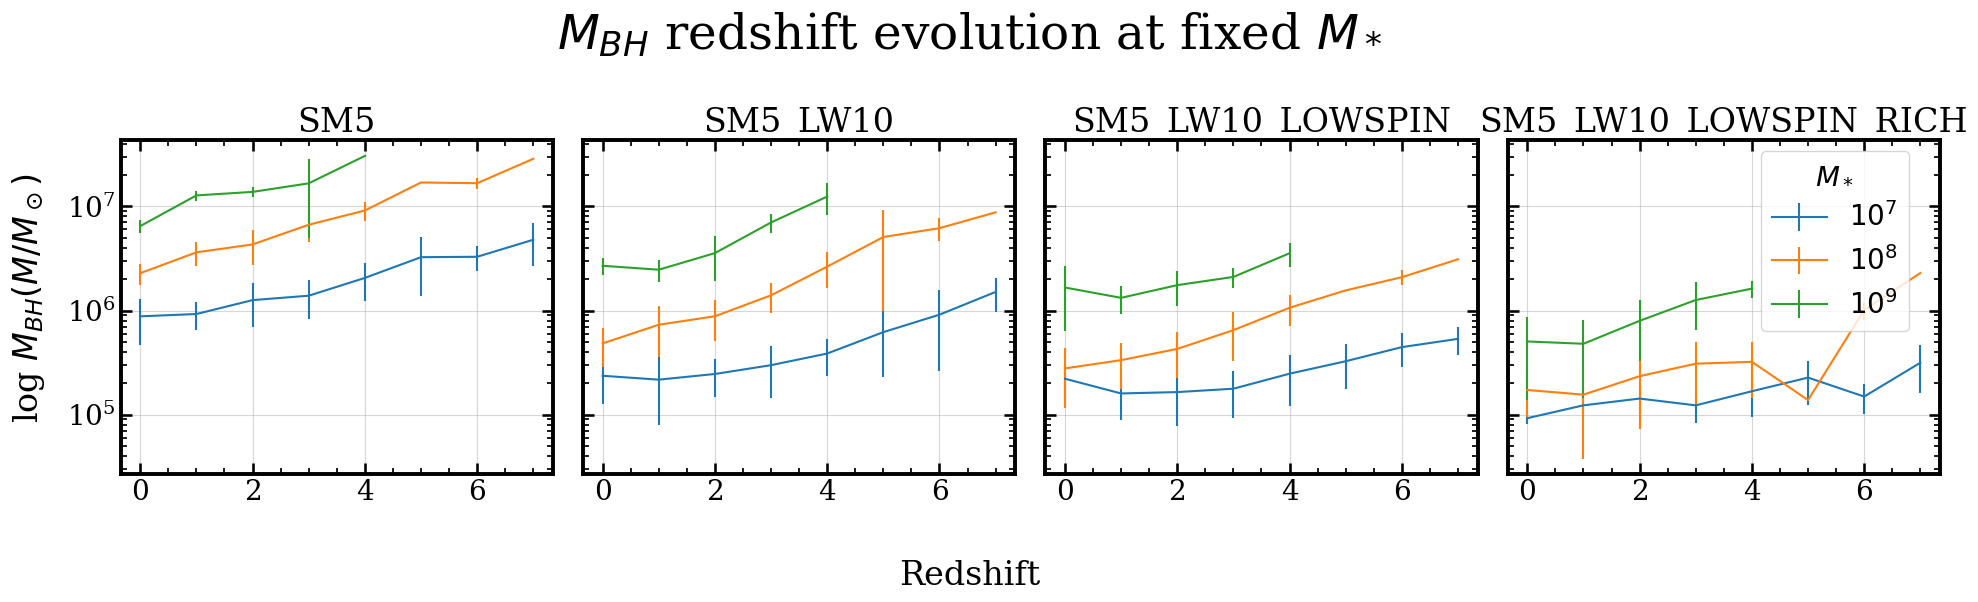

In [7]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(Mstars)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^7$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{8}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{9}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_yscale('log')
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel('log $M_{BH} (M/M_\odot)$')
fig.suptitle('$M_{BH}$ redshift evolution at fixed $M_*$',size=35)
fig.legend(title = '$M_*$',loc = (0.89,0.45),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/M_Mstar_fixed_Mstar.pdf')

# Plotting Mstar - sigma for fixed sigma:

In [9]:
MstarsbFOFz0 = [np.sum(bFOFz0[1][i]) for i in range(len(bFOFz0[1]))]
MstarsbFOFz1 = [np.sum(bFOFz1[1][i]) for i in range(len(bFOFz1[1]))]
MstarsbFOFz2 = [np.sum(bFOFz2[1][i]) for i in range(len(bFOFz2[1]))]
MstarsbFOFz3 = [np.sum(bFOFz3[1][i]) for i in range(len(bFOFz3[1]))]
MstarsbFOFz4 = [np.sum(bFOFz4[1][i]) for i in range(len(bFOFz4[1]))]
MstarsbFOFz5 = [np.sum(bFOFz5[1][i]) for i in range(len(bFOFz5[1]))]
MstarsbFOFz6 = [np.sum(bFOFz6[1][i]) for i in range(len(bFOFz6[1]))]
MstarsbFOFz7 = [np.sum(bFOFz7[1][i]) for i in range(len(bFOFz7[1]))]

MstarsLW10z0 = [np.sum(LW10z0[1][i]) for i in range(len(LW10z0[1]))]
MstarsLW10z1 = [np.sum(LW10z1[1][i]) for i in range(len(LW10z1[1]))]
MstarsLW10z2 = [np.sum(LW10z2[1][i]) for i in range(len(LW10z2[1]))]
MstarsLW10z3 = [np.sum(LW10z3[1][i]) for i in range(len(LW10z3[1]))]
MstarsLW10z4 = [np.sum(LW10z4[1][i]) for i in range(len(LW10z4[1]))]
MstarsLW10z5 = [np.sum(LW10z5[1][i]) for i in range(len(LW10z5[1]))]
MstarsLW10z6 = [np.sum(LW10z6[1][i]) for i in range(len(LW10z6[1]))]
MstarsLW10z7 = [np.sum(LW10z7[1][i]) for i in range(len(LW10z7[1]))]

Mstarsspinz0 = [np.sum(spinz0[1][i]) for i in range(len(spinz0[1]))]
Mstarsspinz1 = [np.sum(spinz1[1][i]) for i in range(len(spinz1[1]))]
Mstarsspinz2 = [np.sum(spinz2[1][i]) for i in range(len(spinz2[1]))]
Mstarsspinz3 = [np.sum(spinz3[1][i]) for i in range(len(spinz3[1]))]
Mstarsspinz4 = [np.sum(spinz4[1][i]) for i in range(len(spinz4[1]))]
Mstarsspinz5 = [np.sum(spinz5[1][i]) for i in range(len(spinz5[1]))]
Mstarsspinz6 = [np.sum(spinz6[1][i]) for i in range(len(spinz6[1]))]
Mstarsspinz7 = [np.sum(spinz7[1][i]) for i in range(len(spinz7[1]))]

Mstarsrichz0 = [np.sum(richz0[1][i]) for i in range(len(richz0[1]))]
Mstarsrichz1 = [np.sum(richz1[1][i]) for i in range(len(richz1[1]))]
Mstarsrichz2 = [np.sum(richz2[1][i]) for i in range(len(richz2[1]))]
Mstarsrichz3 = [np.sum(richz3[1][i]) for i in range(len(richz3[1]))]
Mstarsrichz4 = [np.sum(richz4[1][i]) for i in range(len(richz4[1]))]
Mstarsrichz5 = [np.sum(richz5[1][i]) for i in range(len(richz5[1]))]
Mstarsrichz6 = [np.sum(richz6[1][i]) for i in range(len(richz6[1]))]
Mstarsrichz7 = [np.sum(richz7[1][i]) for i in range(len(richz7[1]))]

In [11]:
sigmas = [1,1.5,2]
bin_width = 0.05

bFOF_sigmas = [Sigma_bFOFz0,Sigma_bFOFz1,Sigma_bFOFz2,Sigma_bFOFz3,Sigma_bFOFz4,Sigma_bFOFz5,Sigma_bFOFz6,Sigma_bFOFz7]
bFOF_mstars = [MstarsbFOFz0,MstarsbFOFz1,MstarsbFOFz2,MstarsbFOFz3,MstarsbFOFz4,
               MstarsbFOFz5,MstarsbFOFz6,MstarsbFOFz7]

LW10_sigmas = [Sigma_LW10z0,Sigma_LW10z1,Sigma_LW10z2,Sigma_LW10z3,Sigma_LW10z4,Sigma_LW10z5,Sigma_LW10z6,Sigma_LW10z7]
LW10_mstars = [MstarsLW10z0,MstarsLW10z1,MstarsLW10z2,MstarsLW10z3,MstarsLW10z4,
               MstarsLW10z5,MstarsLW10z6,MstarsLW10z7]

spin_sigmas = [Sigma_spinz0,Sigma_spinz1,Sigma_spinz2,Sigma_spinz3,Sigma_spinz4,Sigma_spinz5,Sigma_spinz6,Sigma_spinz7]
spin_mstars = [Mstarsspinz0,Mstarsspinz1,Mstarsspinz2,Mstarsspinz3,Mstarsspinz4,
               Mstarsspinz5,Mstarsspinz6,Mstarsspinz7]

rich_sigmas = [Sigma_richz0,Sigma_richz1,Sigma_richz2,Sigma_richz3,Sigma_richz4,Sigma_richz5,Sigma_richz6,Sigma_richz7]
rich_mstars = [Mstarsrichz0,Mstarsrichz1,Mstarsrichz2,Mstarsrichz3,Mstarsrichz4,
               Mstarsrichz5,Mstarsrichz6,Mstarsrichz7]

bFOFavgs,bFOFstds = fixed_x(bFOF_sigmas,bFOF_mstars,sigmas,bin_width)
LW10avgs,LW10stds = fixed_x(LW10_sigmas,LW10_mstars,sigmas,bin_width)
spinavgs,spinstds = fixed_x(spin_sigmas,spin_mstars,sigmas,bin_width)
richavgs,richstds = fixed_x(rich_sigmas,rich_mstars,sigmas,bin_width)

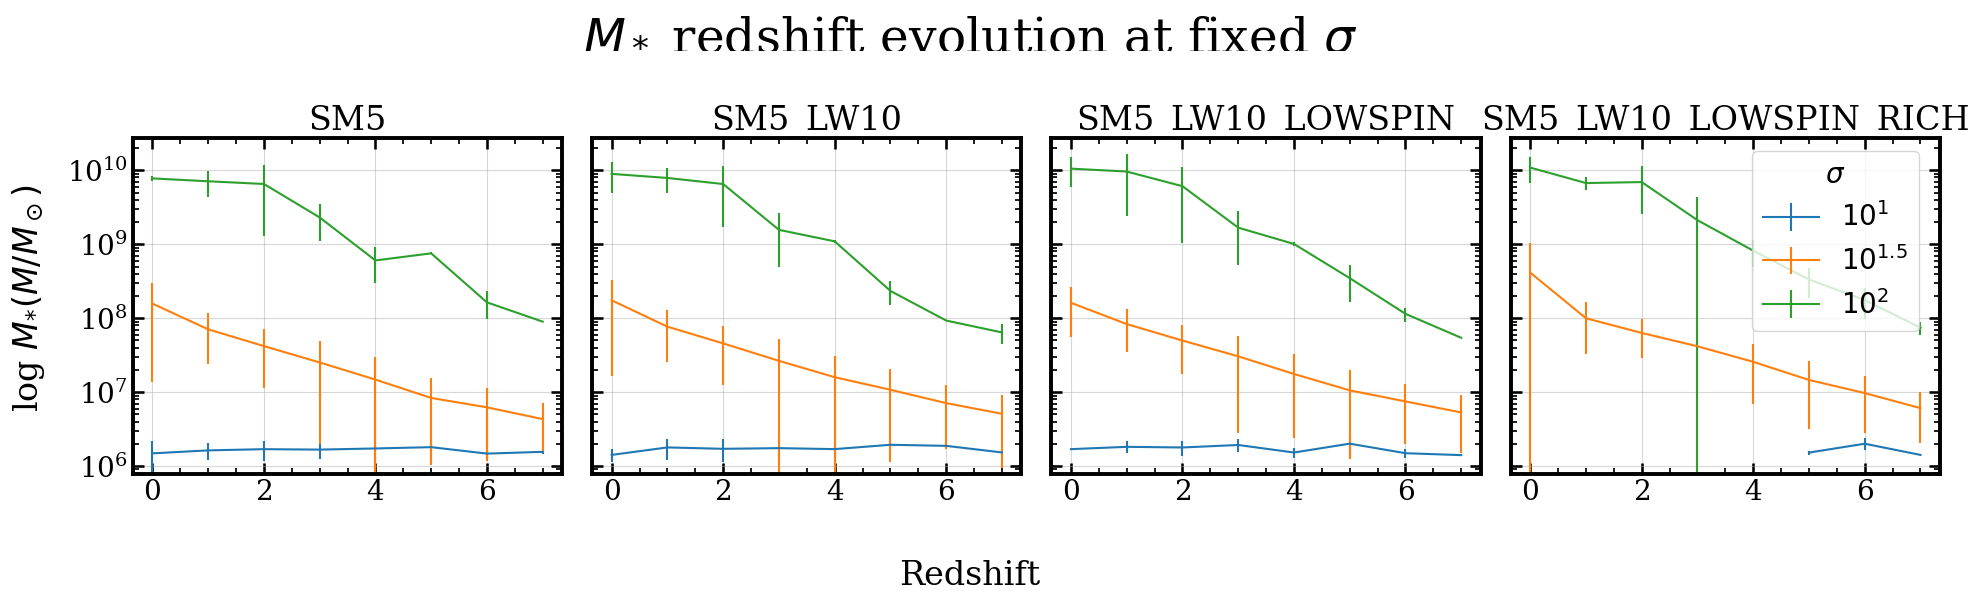

In [12]:
redshifts=[0,1,2,3,4,5,6,7]
titles = ['SM5','SM5_LW10','SM5_LW10_LOWSPIN','SM5_LW10_LOWSPIN_RICH']

fig,axs = plt.subplots(1,4,figsize = (20,6),sharey=True)

for i in range(len(sigmas)):
    if i == 0:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^1$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 1:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{1.5}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    elif i == 2:
        axs[0].errorbar(redshifts,bFOFavgs[i],bFOFstds[i],label = '$10^{2}$')
        axs[1].errorbar(redshifts,LW10avgs[i],LW10stds[i])
        axs[2].errorbar(redshifts,spinavgs[i],spinstds[i])
        axs[3].errorbar(redshifts,richavgs[i],richstds[i])
    
for i in range(len(axs)):
    ax = axs[i]
    ax.set_yscale('log')
    ax.set_title(titles[i])
    ax.grid(alpha=0.5)

fig.supxlabel('Redshift')
fig.supylabel('log $M_{*} (M/M_\odot)$')
fig.suptitle('$M_*$ redshift evolution at fixed $\sigma$',size=35)
fig.legend(title = '$\sigma$',loc = (0.885,0.45),fontsize=20)

fig.tight_layout()

fig.savefig('Plots/Mstar_sigma_fixed_sigma.pdf')

# Now: HMR at fixed stellar mass

In [2]:
bFOF_HMR_z0 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z0')
bFOF_HMR_z1 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z1')
bFOF_HMR_z2 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z2')
bFOF_HMR_z3 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z3')
bFOF_HMR_z4 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z4')
bFOF_HMR_z5 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z5')
bFOF_HMR_z6 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z6')
bFOF_HMR_z7 = ReadBrahmaData('Brahma_Data/Mstar_HMR_bFOF_z7')

In [3]:
a = np.array([1/(1+z) for z in np.arange(0,8,1)]) # For redshift z=0 to z=7

Mstar_z0 = np.log10(np.array(bFOF_HMR_z0[0])*1e10)
Mstar_z1 = np.log10(np.array(bFOF_HMR_z1[0])*1e10)
Mstar_z2 = np.log10(np.array(bFOF_HMR_z2[0])*1e10)
Mstar_z3 = np.log10(np.array(bFOF_HMR_z3[0])*1e10)
Mstar_z4 = np.log10(np.array(bFOF_HMR_z4[0])*1e10)
Mstar_z5 = np.log10(np.array(bFOF_HMR_z5[0])*1e10)
Mstar_z6 = np.log10(np.array(bFOF_HMR_z6[0])*1e10)
Mstar_z7 = np.log10(np.array(bFOF_HMR_z7[0])*1e10)

HMR_z0 = np.array(bFOF_HMR_z0[1])*a[0]
HMR_z1 = np.array(bFOF_HMR_z1[1])*a[1]
HMR_z2 = np.array(bFOF_HMR_z2[1])*a[2]
HMR_z3 = np.array(bFOF_HMR_z3[1])*a[3]
HMR_z4 = np.array(bFOF_HMR_z4[1])*a[4]
HMR_z5 = np.array(bFOF_HMR_z5[1])*a[5]
HMR_z6 = np.array(bFOF_HMR_z6[1])*a[6]
HMR_z7 = np.array(bFOF_HMR_z7[1])*a[7]

In [4]:
mstars = [7,8,9]
bin_width = 0.05

bFOF_mstars = [Mstar_z0,Mstar_z1,Mstar_z2,Mstar_z3,Mstar_z4,Mstar_z5,Mstar_z6,Mstar_z7]
bFOF_HMRs = [HMR_z0,HMR_z1,HMR_z2,HMR_z3,HMR_z4,HMR_z5,HMR_z6,HMR_z7]

avgs,stds = fixed_x(bFOF_mstars,bFOF_HMRs,mstars,bin_width)


/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/apps/software/standard/core/jupyterlab/3.6.3-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in divide
 

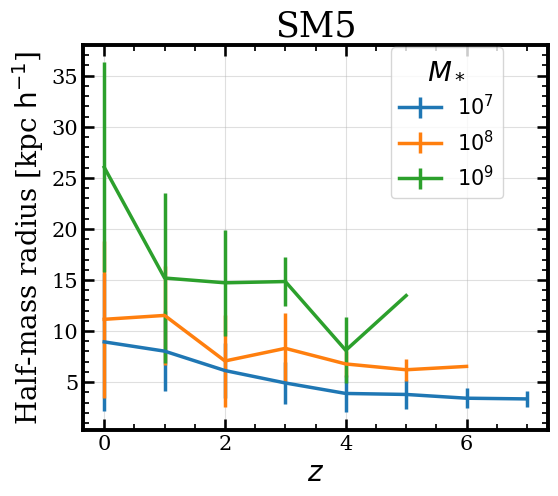

In [5]:
redshifts=[0,1,2,3,4,5,6,7]
labels = ['$10^7$','$10^8$','$10^9$']

fig,ax = plt.subplots(figsize = (6,5))

for i in range(3):
    ax.errorbar(redshifts,avgs[i],stds[i],label=labels[i],lw=2.5)
 
fig.legend(title='$M_*$',fontsize=15,loc=(0.7,0.6))
ax.set_ylabel('Half-mass radius [kpc $\mathrm{h^{-1}}$]',size=20)
ax.set_xlabel('$z$',size=20)
ax.set_title('SM5',size=25)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.grid(alpha=0.4)

plt.savefig('Plots/SM5_HMR_redshift_evol.pdf')